Grupo 21: Ignacio de la Cruz Crespo y Sergio José Gómez Cortés

## Parte 1. Análisis de sentimiento

## Apartado A

Leemos el fichero csv y obvservamos el texto de partida, puesto que deducir futuros problemas.
A continuación:
- Hacemos una particion del 75% para train y 25% para test sobre la frase y el tipo
- Creamos 4 bolsas de palabras segun las especificaciones del enunciado
    1. TF/IDF y monograma
    2. TF/IDF y bigrama
    3. Binaria y monograma
    4. Binaria y bigrama
    
***Naive Bayes***
- Cuando tenemos un TF/IDF (los 2 primeros) es mas util usar el Naive Bayes Gaussiano puesto que la variable es continua
- Cuando es binaria usamos (los 2 ultimos) Naive Bayes Multinomial porque lo que nos interesa estudiar es un entero, la frecuencia

***Arbol de decision***
- Creo los 4 clasificadores en funcion de las 4 bolsas de palabras con max_depth = 16 y y max_leaf_nodes = 18 para conseguir el valor maximo en el test y que no difiera demasiado de train, estos valores se justifican observando las 2 graficas dadas

In [1]:
import pandas as pd
import numpy.ma as ma
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

data= pd.read_csv("yelp_labelled.txt",sep="\t",names=["frase","tipo"])
print(data)

                                                 frase  tipo
0                             Wow... Loved this place.     1
1                                   Crust is not good.     0
2            Not tasty and the texture was just nasty.     0
3    Stopped by during the late May bank holiday of...     1
4    The selection on the menu was great and so wer...     1
..                                                 ...   ...
995  I think food should have flavor and texture an...     0
996                           Appetite instantly gone.     0
997  Overall I was not impressed and would not go b...     0
998  The whole experience was underwhelming, and I ...     0
999  Then, as if I hadn't wasted enough of my life ...     0

[1000 rows x 2 columns]


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
x = data.frase
y = data.tipo

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)


In [3]:
vectorizer1 = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1))
vectorizer2 = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,2))
vectorizer3 = CountVectorizer(stop_words='english', binary=True, ngram_range=(1,1))
vectorizer4 = CountVectorizer(stop_words='english', binary=True, ngram_range=(1,2))

In [4]:
tfidfer = TfidfTransformer()

# train 1
train_vector_data1 = vectorizer1.fit_transform(x_train)
train_vector_data1 = vectorizer1.transform(x_train)
train_preprocessed1 = tfidfer.fit_transform(train_vector_data1)
# test 1
test_vector_data1 = vectorizer1.fit_transform(x_train)
test_vector_data1 = vectorizer1.transform(x_test)
test_preprocessed1 = tfidfer.fit_transform(test_vector_data1)
# train 2
train_vector_data2 = vectorizer2.fit_transform(x_train)
train_vector_data2 = vectorizer2.transform(x_train)
train_preprocessed2 = tfidfer.fit_transform(train_vector_data2)
# test 2
test_vector_data2 = vectorizer2.fit_transform(x_train)
test_vector_data2 = vectorizer2.transform(x_test)
test_preprocessed2 = tfidfer.fit_transform(test_vector_data2)
# train 3
train_vector_data3 = vectorizer3.fit_transform(x_train)
train_vector_data3 = vectorizer3.transform(x_train)
# test 3
test_vector_data3 = vectorizer3.fit_transform(x_train)
test_vector_data3 = vectorizer3.transform(x_test)
# train 4 
train_vector_data4 = vectorizer4.fit_transform(x_train)
train_vector_data4 = vectorizer4.transform(x_train)
# test 4
test_vector_data4 = vectorizer4.fit_transform(x_train)
test_vector_data4 = vectorizer4.transform(x_test)


In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

gsn_classifier = GaussianNB()
mnb_classifier = MultinomialNB()


gsn_classifier.fit(train_preprocessed1.toarray(),y_train)
gsn_train_predictions1 = gsn_classifier.predict(train_preprocessed1.toarray())
gsn_test_predictions1 = gsn_classifier.predict(test_preprocessed1.toarray())                                                                                                           
print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gsn_train_predictions1 == y_train))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gsn_test_predictions1 == y_test))


gsn_classifier.fit(train_preprocessed2.toarray(),y_train)
gsn_train_predictions2 = gsn_classifier.predict(train_preprocessed2.toarray())
gsn_test_predictions2 = gsn_classifier.predict(test_preprocessed2.toarray())                                                                                                            
print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gsn_train_predictions2 == y_train))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gsn_test_predictions2 == y_test))



mnb_classifier.fit(train_vector_data3,y_train)
mnb_train_predictions1 = mnb_classifier.predict(train_vector_data3)
mnb_test_predictions1 = mnb_classifier.predict(test_vector_data3)
print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions1 == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions1 == y_test))



mnb_classifier.fit(train_vector_data4,y_train)
mnb_train_predictions2 = mnb_classifier.predict(train_vector_data4)
mnb_test_predictions2 = mnb_classifier.predict(test_vector_data4)
print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions2 == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions2 == y_test))



Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.96
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.64
Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.98
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.664
Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9586666666666667
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.748
Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.992
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.748


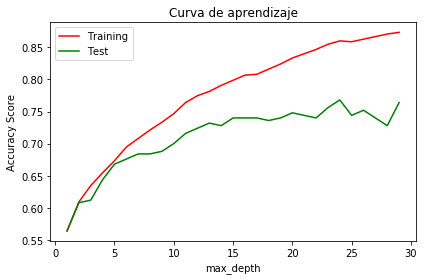

In [31]:
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []

max_depths = range(1, 30)
for md in max_depths: 
    tree_classifier1 = tree.DecisionTreeClassifier(max_depth = md)
    tree_classifier1.fit(train_preprocessed1, y_train)
    tree_train_predictions1 = tree_classifier1.predict(train_preprocessed1)
    tree_test_predictions1 = tree_classifier1.predict(test_preprocessed1)
    
    train_accuracy.append(np.mean(tree_train_predictions1 == y_train))
    test_accuracy.append(np.mean(tree_test_predictions1 == y_test))
# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")
# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("max_depth"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show() 

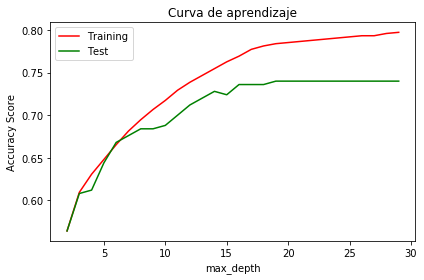

In [94]:
#Sabiendo que max_depth se maximiza para test en 16 busco un max_leaf_nodes
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []

max_depths = range(2, 30)
for md in max_depths: 
    tree_classifier1 = tree.DecisionTreeClassifier(max_depth = 16, max_leaf_nodes = md)
    tree_classifier1.fit(train_preprocessed1, y_train)
    tree_train_predictions1 = tree_classifier1.predict(train_preprocessed1)
    tree_test_predictions1 = tree_classifier1.predict(test_preprocessed1)
    
    train_accuracy.append(np.mean(tree_train_predictions1 == y_train))
    test_accuracy.append(np.mean(tree_test_predictions1 == y_test))
# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")
# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("max_depth"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show() 

In [8]:
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier1 = tree.DecisionTreeClassifier(max_depth = 16, max_leaf_nodes = 18)
tree_classifier1.fit(train_preprocessed1, y_train)

tree_train_predictions1 = tree_classifier1.predict(train_preprocessed1)
tree_test_predictions1 = tree_classifier1.predict(test_preprocessed1)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions1 == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions1 == y_test))

tree_classifier2 = tree.DecisionTreeClassifier(max_depth = 16, max_leaf_nodes = 18)
tree_classifier2.fit(train_preprocessed2, y_train)

tree_train_predictions2 = tree_classifier2.predict(train_preprocessed2)
tree_test_predictions2 = tree_classifier2.predict(test_preprocessed2)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions2 == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions2 == y_test))

tree_classifier3 = tree.DecisionTreeClassifier(max_depth = 16, max_leaf_nodes = 18)
tree_classifier3.fit(train_vector_data3, y_train)

tree_train_predictions3 = tree_classifier3.predict(train_vector_data3)
tree_test_predictions3 = tree_classifier3.predict(test_vector_data3)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions3 == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions3 == y_test))

tree_classifier4 = tree.DecisionTreeClassifier(max_depth = 16, max_leaf_nodes = 18)
tree_classifier4.fit(train_vector_data4, y_train)

tree_train_predictions4 = tree_classifier4.predict(train_vector_data4)
tree_test_predictions4 = tree_classifier4.predict(test_vector_data4)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions3 == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions3 == y_test))



Árbol, porcentaje de aciertos en entrenamiento: 0.7813333333333333
Árbol, porcentaje de aciertos en test: 0.736
Árbol, porcentaje de aciertos en entrenamiento: 0.7813333333333333
Árbol, porcentaje de aciertos en test: 0.728
Árbol, porcentaje de aciertos en entrenamiento: 0.7546666666666667
Árbol, porcentaje de aciertos en test: 0.716
Árbol, porcentaje de aciertos en entrenamiento: 0.7546666666666667
Árbol, porcentaje de aciertos en test: 0.716


**¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?**

El clasificador Naive Bayes ofrece un resultado superior al Arbol de Decision, ya que un arbol demasiado sencillo tiende a hacer "overfitting", cuya solucion consiste en realizar una poda. Esta poda podria dejar fuera valores clave del conjunto de datos o ser demasiado compleja.

**Para cada clasificador, ¿tiene un efecto positivo el añadir “complejidad” a la
vectorización? Es decir, añadir bigramas y añadir tf-idf. ¿Por qué crees que sucede este
efecto positivo o la falta del mismo?**

Para el clasificador Naive Bayes se nota una mejoria al aplicar la Transformacion TF/IDF, sin embargo no parece afectar el hecho de trabajar con monogramas o bigramas. En este caso al tratarse de un texto de opinion los bigramas no aportan mucha mas informacion que lo que lo harian los unigramas ya que escogeria palabras de opinion (good/bad/best...) y las emparejarian con sustantivos (restaurant/food/sauce...) lo que los harian redundantes. En algunos casos se podrian encontrar bigramas dependientes del contexto que cambien el sentimiento de la palabra de opinion, pero en nuestro ejemplo no parecen haber muchos de estos. Esto tambien se aplica a los arboles de decision.
La aplicacion de la transformacion TF/IDF sobre el corpus mejora la reduccion del ruido, en nuestro caso mejorando la precision con la que el clasificador reconoce las palabras especificas del texto.




***

A continuacion obtengo las 25 variables mas relevantes para el mejor Naive Bayes y el mejor arbol de decision, es decir, con mas presencia en la clase y mas poder discriminante respectivamente

In [9]:
def print_top25_features_in_trees(vectorizer, clf):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names()
    
    top25 = np.argsort(clf.feature_importances_)[-25:]
    reversed_top = top25[::-1]
    print("Top 25 features in the tree\n")
    print("%s" % ( " / ".join(feature_names[j] for j in reversed_top)))
def print_top25_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    print("Top 25 features per class\n")
    for i, class_label in enumerate(class_labels):
        top25 = np.argsort(clf.feature_log_prob_[i])[-25:]
        reversed_top = top25[::-1]
        
        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')

In [10]:
print_top25_features_in_trees(vectorizer2,tree_classifier2)

Top 25 features in the tree

great / good / nice / delicious / amazing / friendly / fantastic / awesome / restaurant / best / love / excellent / loved / definitely / perfect / vegas / good way / friends basically / fries beer / free years / freezing cold / freezing / freaking sandwich / frenchman / fresh


In [11]:
print_top25_features_per_class_in_NB(vectorizer4,mnb_classifier,["Negativos","Positivos"]) 

Top 25 features per class

Negativos: food / place / service / like / time / good / bad / don / won / minutes / really / eat / ve / going / worst / did / disappointed / better / just / wasn / think / way / came / times / bland 

Positivos: good / great / food / place / service / friendly / time / nice / delicious / amazing / really / restaurant / awesome / vegas / best / staff / just / love / like / fantastic / experience / definitely / server / atmosphere / menu 



**ARBOL ¿Predominan más las palabras de uno u otro sentimiento? ¿por qué? ¿hay ruido?**

Predominan las palabras que transmiten un sentimiento positivo, esto puede deberse a dos razones, la primera que simplemente haya una mayor cantidad de frases positivas en el data, o que los puntos positivos sean muy concretos mientras que los negativos se dispersen en diferentes opiniones.
Ademas existe ruido con palabras como "restaurant" o "food want" que podrian referirse en su contexto a sentimientos tanto positivos como negativos

**NAIVE BAYES ¿Tienen sentido las palabras seleccionadas? ¿hay ruido (palabras sin sentimiento o de
sentimiento opuesto al esperado)? ¿por qué crees que suceden estos fenómenos?**

Tanto en positivos como en negativos tienen sentido las palabras seleccionadas porque la mayoria del conjunto esta clasificado correctamente, sin embargo existe ruido con palabra como like en negativos, que deberia ser positivo, eat en negativos que no expresa sentimiento o chicken en positivos, que tampoco expresa sentimiento. Esto sucede porque son palabras que se usan reiteradamente en ambas opciones, siendo una de las variables mas importantes para el clasificador


**Finalmente, explica de manera razonada las conclusiones que has extraído de todo el estudio
realizado en este apartado.**

Los arboles de decision son menos complejos y faciles de depurar, si se trata de predecir un valor categorico el arbol es un buen clasificador, porque no necesitan configuracion, sin embargo encontramos problemas como la poda, como hemos visto anteriormente y su tendencia a sobreajustarse, para solucionar estos problemas habria que añadirle complejidad.
Naive Bayes asume que las variables no poseen correlacion, analiza la frecuencia con la que dichas variables pertenezcan a una clase, esto lo hace decente frente a problemas de probabilidad o de referencia, ademas la posibilidad de descartar una solucion evidente pero escasa es mucho menor frente a un arbol de decision


---
## Apartado B



              precision    recall  f1-score   support

   Negativos       0.80      0.66      0.72       125
   Positivos       0.71      0.83      0.77       125

    accuracy                           0.75       250
   macro avg       0.76      0.75      0.75       250
weighted avg       0.76      0.75      0.75       250



(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

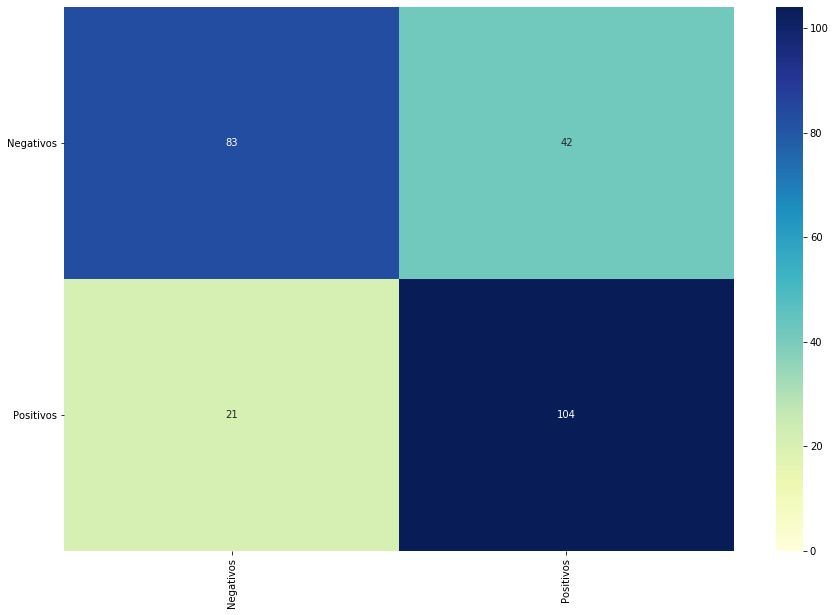

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

classifier=mnb_classifier
predictions = mnb_test_predictions2
print(classification_report(y_test, predictions, target_names=["Negativos","Positivos"]))
%matplotlib inline
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Negativos","Positivos"], columns=["Negativos","Positivos"])
plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

              precision    recall  f1-score   support

   Negativos       0.67      0.88      0.76       125
   Positivos       0.83      0.58      0.68       125

    accuracy                           0.73       250
   macro avg       0.75      0.73      0.72       250
weighted avg       0.75      0.73      0.72       250



(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

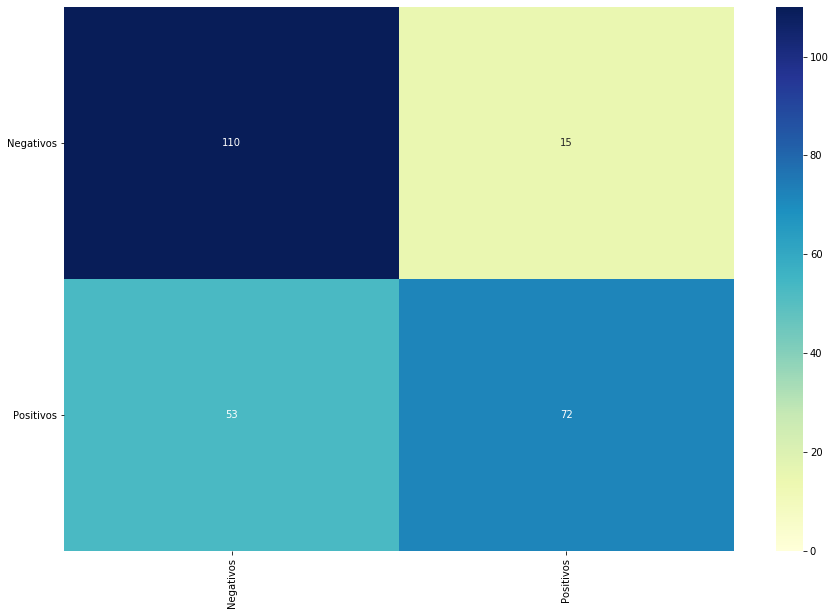

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

classifier=tree_classifier2
predictions = tree_test_predictions2
print(classification_report(y_test, predictions, target_names=["Negativos","Positivos"]))
%matplotlib inline
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Negativos","Positivos"], columns=["Negativos","Positivos"])
plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

**Analiza la precisión y la exhaustividad de cada clasificador en cada una de las clases (opiniones positivas y negativas).**

En el naive Bayes para los negativos tenemos un precision de 0.83 y una exhaustividad de 0.68 lo cual quiere decir que da la posibilidad a confundirse con otros, mientras que en los positivos tenemos una precision de 0.68 y una exhaustividad de 0.83 lo cual quiere decir que resulta mas complicado encontrar rasgos distintivos para el clasificador
En el arbol de decision para los positivos tenemos un precision de 0.81 y una exhaustividad de 0.57 lo cual quiere decir que da la posibilidad a confundirse con otros, mientras que en los negativos tenemos una precision de 0.71 y una exhaustividad de 0.89 lo cual quiere decir que resulta mas complicado encontrar rasgos distintivos para el clasificador
Esto se refleja visualmente en las respectivas matrices de confusion

**Para cada clasificador, ¿tiene un comportamiento homogéneo a la hora de clasificar ambas clases?**

No, como trivialmente se ve debido al analisis de precision y exhaustividad

**¿Cuáles son las fortalezas y debilidades de cada uno de los clasificadores?**

Contestado en las conclusiones del apartado a
El clasificador Naive Bayes presenta un menor numero de falsos negativos mientras que en el Arbol de Decision este valor se invierte en los falsos positivos.

**¿Hay algún clasificador que sea mejor que el otro en todo?**

No, por ejemplo en naive bayes la precision para los positivos es mayor que en el arbol, y en el arbol la precision para los negativos es mayor que la de naive bayes

**¿Coinciden ambos clasificadores a la hora de clasificar mejor una clase que la otra?**

Coinciden a la hora de clasificar mejor los negativos aunque no los positivos

In [14]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(200,200))
plot_tree(tree_classifier1, max_depth = 8,filled=True, feature_names = vectorizer1.get_feature_names(), class_names = ["Negativos","Positivos"], rounded=True)
plt.show()

**¿Qué estructura tiene el árbol?**

Es un arbol binario inclinado hacia la izquierda

**¿Cómo interpretas los niveles que has pintado? ¿tienen algún sentido con respecto a la tasa de aciertos, o la precisión y exhaustividad del clasificador?**

Tiene sentido respecto al analisis de exhaustividad y precision puesto que en dicho analisis concluimos que clasifica mejor los negativos que los positivos y en los 8 primeros niveles de este arbol se ve como reserva mas nodos para los casos de class = Negativos

**¿Hay nodos impuros?**

Si, por ejemplo abajo a la izquierda "best"


In [93]:
FalsaPositiva1 = 0
FalsaPositiva2 = 0
FalsaNegativa1 = 0
FalsaNegativa2 = 0
flag1 = True
flag2 = True
flag3 = True
flag4 = True
for i in range (len(y_train)):
    if (y_train[y_train.index[i]] == 0 and tree_train_predictions2[i]  == 1 and flag1):
        FalsaPositiva1 = x_train[y_train.index[i]]
        flag1 = False
    elif (y_train[y_train.index[i]] == 0 and tree_train_predictions2[i]  == 1 and flag2):
        FalsaPositiva2 = x_train[y_train.index[i]]
        flag2 = False
    if (y_train[y_train.index[i]] == 1 and tree_train_predictions2[i]  == 0 and flag3):
        FalsaNegativa1 = x_train[y_train.index[i]]
        flag3 = False
    elif (y_train[y_train.index[i]] == 1 and tree_train_predictions2[i]  == 0 and flag4):
        FalsaNegativa2 = x_train[y_train.index[i]]
        flag4 = False

print(FalsaPositiva1)
print(FalsaPositiva2)
print(FalsaNegativa1)
print(FalsaNegativa2)


There is so much good food in Vegas that I feel cheated for wasting an eating opportunity by going to Rice and Company.
This place is not worth your time, let alone Vegas.
The atmosphere here is fun.
I really do recommend this place, you can go wrong with this donut place!


**¿Por qué crees que ha fallado el clasificador en cada uno de los casos?**

El primer caso ha clasificado la frase como positivo en vez de negativo por la palabra "good"
El segundo caso ha clasificado la frase como positivo en vez de negativo por la palabra "worth"
El tercer caso quizas ha clasificado la frase como negativo en vez de positivo por la palabra "atmosphere" pero no estamos seguros
El cuarto caso ha clasificado la frase como negativo en vez de positivo por la palabra "wrong"

**¿Se te ocurre alguna idea sobre cómo mejorar el clasificador de sentimiento?**

Si, añadir las negaciones de las palabras claves como sentimiento opuesto de dicha palabra clave, es decir "good" que se clasificaría como positiva, clasificar entonces "not good" como negativa.